In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

In [44]:
def numerical_gradident(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i, val in enumerate(x):
        # f(x + h)
        x[i] = val + h
        f1 = f(x)
        # f(x - h)
        x[i] = val - h
        f2 = f(x)
        # grad
        grad[i] = (f1 - f2) / (2 * h)
        # restore
        x[i] = val
    return grad

In [53]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    path = np.zeros((step_num + 1, init_x.size), dtype=np.float32)
    grad = np.zeros((step_num + 1, init_x.size), dtype=np.float32)
    path[0] = init_x
    grad[0] = numerical_gradident(f, path[0])
    for i in range(1, step_num + 1):
        path[i] = path[i - 1] - (lr * grad[i - 1])
        grad[i] = numerical_gradident(f, path[i])
    return path, grad

# Function 1
$$ f(x) = x^4 - 3x^2 + 2 $$

[1.2249577] [0.]


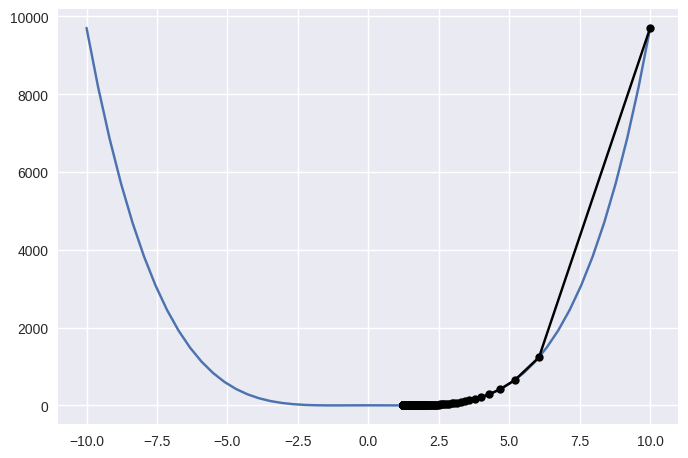

In [73]:
def f(x):
    return x**4 - 3 * x**2 + 2
path, grad = gradient_descent(f, np.array([10.0]), lr=0.001, step_num=1000)
print(path[-1], grad[-1])

fig, ax = plt.subplots(dpi=100)
xs = np.linspace(-10, 10, 50)
ax.plot(xs, f(xs))
ax.plot(path[:, 0], f(path[:, 0]), color='k', marker='o', markersize=6)
plt.show()

# Function 2
$$ f(x_0, x_1) = 100(x_1 - x_0)^2 + (1 - x_0)^2$$

In [75]:
def plot_3d(ax, f, limit=10, interval=1, elev=45, azim=30):
    xs = np.arange(-limit, +limit, interval)
    ys = np.arange(-limit, +limit, interval)
    x0, x1 = np.meshgrid(xs, ys, sparse=True)
    ax.plot_surface(x0, x1, f([x0, x1]) , cmap=plt.cm.jet, alpha=0.7)
    ax.view_init(elev=elev, azim=azim)
    return ax

def plot_path(ax, f, xs, ys, label):
    ax.plot(xs, ys, f([xs, ys]), color='k', marker='o', markersize=6, label=label)
    return ax

[0.9999733 0.9999732] [-2.9568810e-05 -2.3845814e-05]


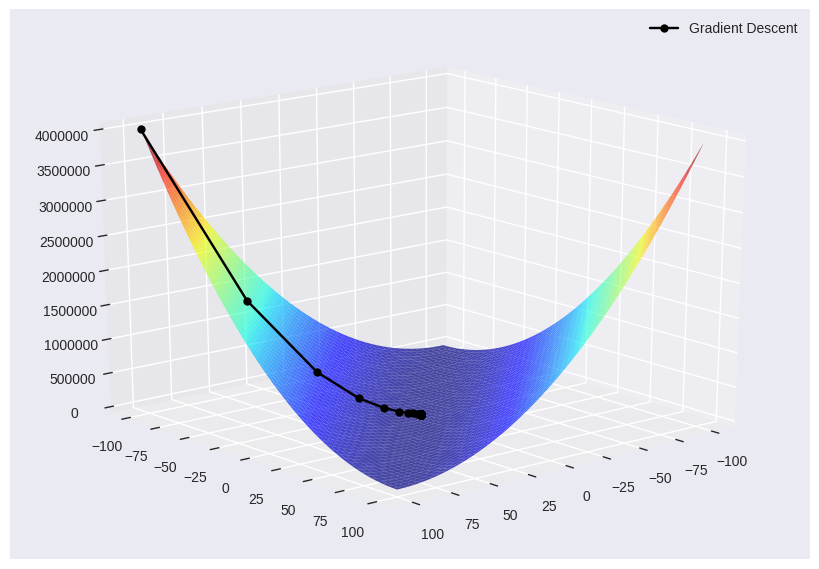

In [76]:
def f(x): # "fake" banana function
    return 100 * (x[1] - x[0]) ** 2 + (1 - x[0])**2

path, grad = gradient_descent(f, np.array([100.0, -100.0]), lr=0.001, step_num=20000)
print(path[-1], grad[-1])

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax = plot_f(ax, f, elev=20, azim=50, limit=100)
ax = plot_path(ax, f, path[:, 0], path[:, 1], 'Gradient Descent')
ax.legend()
plt.show()

# Function 3
$$ f(x_0, x_1) = x_0^2 + x_1^2 $$

[ 2.034752e-09 -2.034752e-09] [ 4.0672603e-09 -4.0672603e-09]


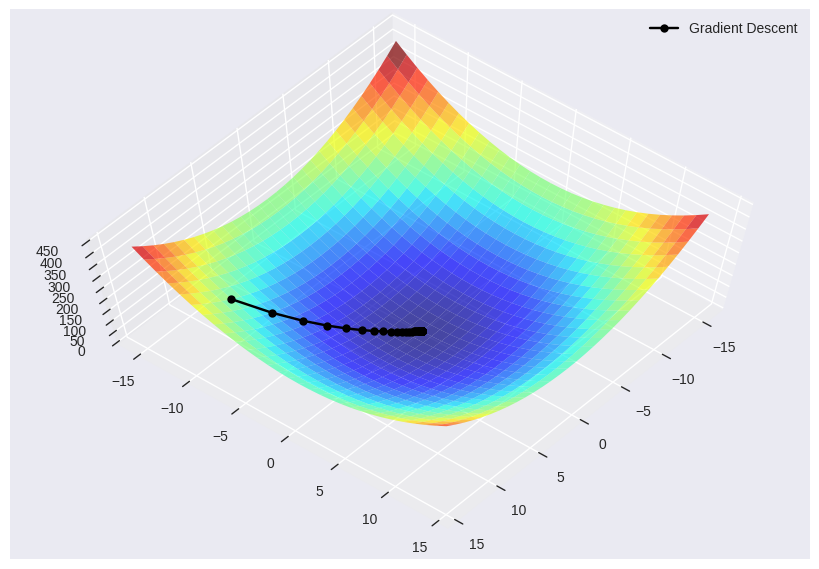

In [77]:
def f(x):
    return x[0]**2 + x[1]**2
path, grad = gradient_descent(f, np.array([10.0, -10.0]), lr=0.1, step_num=100)
print(path[-1], grad[-1])

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax = plot_f(ax, f, elev=70, azim=40, limit=15)
ax = plot_path(ax, f, path[:, 0], path[:, 1], 'Gradient Descent')
ax.legend()
plt.show()

# Function 4
$$ f(x_0, x_1) = \frac{1}{20} x_0^2 + x_1^2 $$

[ 5.175555e-04 -9.299228e-13] [5.1755553e-05 0.0000000e+00]


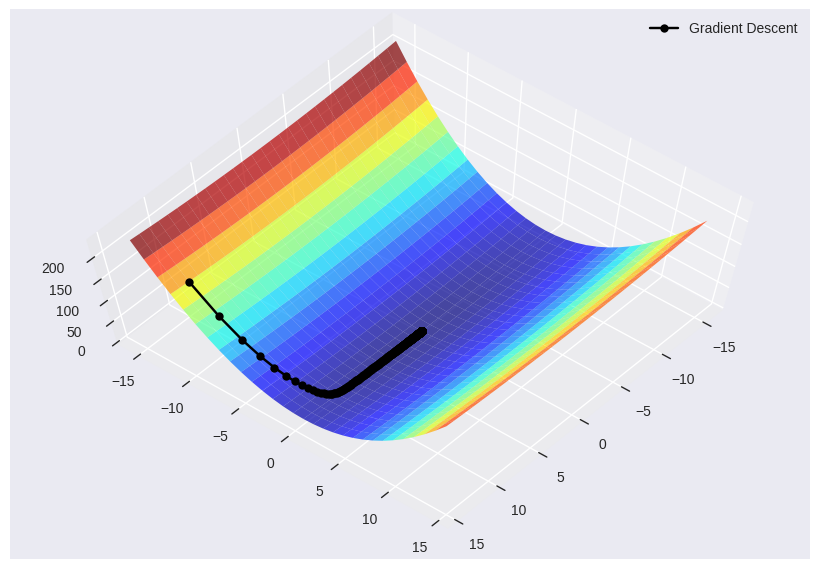

In [82]:
def f(x):
    return x[0]**2 / 20 + x[1]**2
path, grad = gradient_descent(f, np.array([12.0, -12.0]), lr=0.1, step_num=1000)
print(path[-1], grad[-1])

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax = plot_f(ax, f, elev=70, azim=30, limit=15)
ax = plot_path(ax, f, path[:, 0], path[:, 1], 'Gradient Descent')
ax.legend()
plt.show()